In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv("glass.csv")

In [3]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [4]:
df.shape

(214, 10)

In [5]:
df.head(10)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


In [6]:
X=df.iloc[:,9]
X

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 214, dtype: int64

In [7]:
Y=df.drop(["Type"],axis=1)
Y

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [8]:
#Normalize the Functio
def norm_func(i):
    x=(i-i.min()/i.max()-i.min())
    return(x)

In [9]:
Y1=norm_func(Y)

In [10]:
#Split model
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(Y1,X,test_size=0.2)

In [11]:
from sklearn.neighbors import KNeighborsClassifier as KN
model=KN(n_neighbors=3)
model.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=3)

In [12]:
y_pred = model.predict(X_test)
y_pred

array([2, 1, 6, 2, 1, 7, 7, 7, 1, 2, 2, 1, 1, 1, 6, 2, 7, 1, 1, 5, 2, 1,
       1, 2, 2, 2, 1, 7, 2, 2, 2, 1, 1, 7, 1, 1, 2, 1, 1, 1, 2, 7, 1],
      dtype=int64)

In [13]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

[[9 2 0 0 0 0]
 [5 9 0 0 1 0]
 [4 0 0 0 0 0]
 [1 1 0 1 0 0]
 [0 1 0 0 1 1]
 [0 1 0 0 0 6]]
              precision    recall  f1-score   support

           1       0.47      0.82      0.60        11
           2       0.64      0.60      0.62        15
           3       0.00      0.00      0.00         4
           5       1.00      0.33      0.50         3
           6       0.50      0.33      0.40         3
           7       0.86      0.86      0.86         7

    accuracy                           0.60        43
   macro avg       0.58      0.49      0.50        43
weighted avg       0.59      0.60      0.57        43



C:\Users\Harsh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
#Train Accuracy
Train_acc=np.mean(model.predict(X_train)==Y_train)
Train_acc

0.8187134502923976

In [15]:
#Test Accuracy
Test_acc=np.mean(model.predict(X_test)==Y_test)
Test_acc

0.6046511627906976

In [16]:
model1=KN(n_neighbors=5)
model1.fit(X_train,Y_train)

KNeighborsClassifier()

In [17]:
acc = []
# Calculating error for K values between 1 and 40
for i in range(1,50):
    model1=KN(n_neighbors=i)
    model1.fit(X_train,Y_train)
    pred_i = model1.predict(X_test)
    acc.append(np.mean(pred_i != Y_test))

Text(0, 0.5, 'Mean Error')

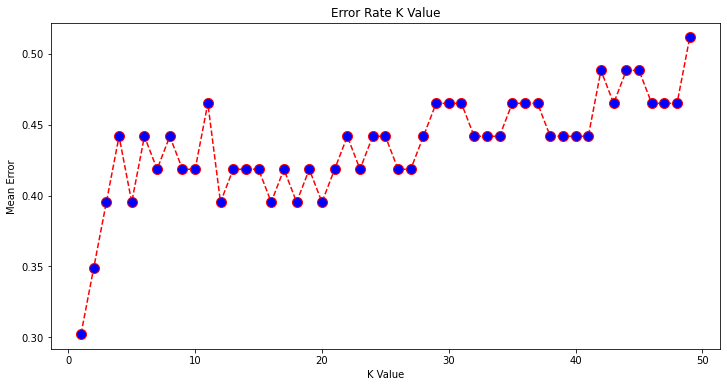

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(range(1,50), acc, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [19]:
#Select K=17
model_fin=KN(n_neighbors=5)
model_fin.fit(X_train,Y_train)

train_fin=np.mean(model_fin.predict(X_train)==Y_train)
train_fin

0.7953216374269005

In [20]:
test_fin=np.mean(model_fin.predict(X_test)==Y_test)
test_fin

0.6046511627906976